# Data cleaning and engineering 

This project isn't so much about predictive data science, although it does use some models; it's more about exploring and cleaning data and finding out what it can tell us.

It's also currently a work-in-progress and I'll be adding to it continually.

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.options.display.max_columns=999

## Data sources

The source for this data on Nitrogen Dioxide (NO2) is BreatheLondon.org (https://www.breathelondon.org/methodology/)  

Originally I used data which was published for Feb 2019 through to Nov 2019, and used it to make some predictions around when NO2 levels would be above and below legal safe levels. However, since there have been dramatic changes in air quality after the Coronavirus crisis began in March 2020 and results up to May 2020 are now available, I wanted to come back to the data to see if there were any further insights I could gather. 

The public health implications of air quality have always been serious, but they've received more public recognition since the Covid-19 crisis as exposure to air pollution causes the long term health conditions that are risk factors for worse outcomes from Covid-19, as well as increasing susceptibility to viral infections in the short term.

There is also now a greater public awareness that access to clean air is very unequal, with areas which have lower socioeconomic indicators also tending to report higher levels of air pollution. 

In [4]:
# reading in NO2 data from the csv file as a dataframe 

path = "NO2_Dataset.csv"
NO2 = pd.read_csv(path)

NO2.head(20)

,date_UTC,no2_ugm3,pod_id_location,pod_id,location_name,ratification_status
0,2019-02-15 17:00:00,105.38,1245,1245,Dollis Road,P
1,2019-02-15 18:00:00,114.95,1245,1245,Dollis Road,P
2,2019-02-15 19:00:00,124.39,1245,1245,Dollis Road,P
3,2019-02-15 20:00:00,114.77,1245,1245,Dollis Road,P
4,2019-02-15 21:00:00,101.42,1245,1245,Dollis Road,P
5,2019-02-15 22:00:00,89.04,1245,1245,Dollis Road,P
6,2019-02-15 23:00:00,85.75,1245,1245,Dollis Road,P
7,2019-02-16 00:00:00,90.30,1245,1245,Dollis Road,P
8,2019-02-16 01:00:00,81.51,1245,1245,Dollis Road,P
9,2019-02-16 02:00:00,77.33,1245,1245,Dollis Road,P


In [5]:
# reading in metadata on the NO2 sensors from a csv file as a dataframe 

path = "NO2_site_metadata.csv"
NO2_meta = pd.read_csv(path)

NO2_meta.head(20)

,pod_id_location,start_date_UTC,end_date_UTC,relocate_date_UTC,scaling_method,location_name,Borough,Type,ULEZ,Latitude,Longitude,X_Coord,Y_Coord,Distance_from_Road,Height
0,1245,2019-02-15 16:45:00,2019-12-11 17:00:00,NaN,Gold Pod Colocation,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.100
1,2245,2019-05-05 01:00:00,2020-01-11 13:56:00,NaN,Network Based Calibration,Great Ormond St Hospital,Camden,Roadside,Yes,51.521880,-0.120434,530499.4261,182002.3181,2.5,2.800
2,3245,2018-10-04 18:00:00,2020-07-14 00:59:00,NaN,Gold Pod Colocation,Savernake Road,Camden,Urban Background,No,51.555485,-0.152338,528191.7240,185682.9587,5.0,2.297
3,4245,2019-02-19 15:00:00,2020-06-27 09:29:00,NaN,Gold Pod Colocation,Wandsworth Road,Lambeth,Kerbside,No,51.475735,-0.131209,529881.9791,176852.2693,0.5,3.120
4,5245,2018-11-26 10:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Garrett Lane,Wandsworth,Kerbside,No,51.440399,-0.186775,526117.9944,172825.4459,1.0,3.445
5,6245,2019-01-11 14:45:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Hanworth Road,Hounslow,Kerbside,No,51.468625,-0.359770,514028.3706,175680.7242,1.2,3.200
6,7245,2018-09-20 13:00:00,2020-07-14 00:59:00,NaN,Gold Pod Colocation,Church Street,Greenwich,Kerbside,No,51.481300,-0.009860,538290.7319,177691.8136,0.5,3.000
7,8245,2019-03-11 15:00:00,2020-07-14 00:59:00,NaN,Gold Pod Colocation,Geraldine Street,Southwark,Urban Background,Yes,51.495620,-0.105412,531617.1416,179108.9980,21.0,2.225
8,11245,2019-04-05 03:00:00,2020-07-14 00:59:00,NaN,Gold Pod Colocation,Cadogan Gardens,Kensington & Chelsea,Roadside,No,51.493217,-0.158772,527919.9752,178747.2644,2.3,1.762
9,12245,2018-10-09 13:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Pattison Road,Barnet,Urban Background,No,51.560877,-0.195749,525167.0635,186206.4587,8.3,1.750


In [6]:
# reading in Particulate Matter 2.5 data from the csv file as a dataframe 

path = "PM2.5_Dataset.csv"
PM25 = pd.read_csv(path)

PM25.head(20)

,date_UTC,pm2_5_ugm3,pod_id_location,pod_id,location_name,ratification_status
0,2019-02-15 13:00:00,-999.00,1245,1245,Dollis Road,P
1,2019-02-15 14:00:00,19.46,1245,1245,Dollis Road,P
2,2019-02-15 15:00:00,20.91,1245,1245,Dollis Road,P
3,2019-02-15 16:00:00,36.42,1245,1245,Dollis Road,P
4,2019-02-15 17:00:00,22.59,1245,1245,Dollis Road,P
5,2019-02-15 18:00:00,17.60,1245,1245,Dollis Road,P
6,2019-02-15 19:00:00,17.37,1245,1245,Dollis Road,P
7,2019-02-15 20:00:00,21.44,1245,1245,Dollis Road,P
8,2019-02-15 21:00:00,22.80,1245,1245,Dollis Road,P
9,2019-02-15 22:00:00,25.75,1245,1245,Dollis Road,P


In [7]:
# reading in metadata on PM2.5 sensors from the csv file as a dataframe 

path = "PM2.5_site_metadata.csv"
PM25_meta = pd.read_csv(path)

PM25_meta.head(20)

,pod_id_location,start_date_UTC,end_date_UTC,relocate_date_UTC,scaling_method,location_name,Borough,Type,ULEZ,Latitude,Longitude,X_Coord,Y_Coord,Distance_from_Road,Height
0,1245,2019-02-15 12:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.100
1,2245,2019-05-03 10:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Great Ormond St Hospital,Camden,Roadside,Yes,51.521880,-0.120434,530499.4261,182002.3181,2.5,2.800
2,3245,2018-10-04 18:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Savernake Road,Camden,Urban Background,No,51.555485,-0.152338,528191.7240,185682.9587,5.0,2.297
3,4245,2019-03-06 14:35:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Wandsworth Road,Lambeth,Kerbside,No,51.475735,-0.131209,529881.9791,176852.2693,0.5,3.120
4,5245,2019-03-06 15:55:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Garrett Lane,Wandsworth,Kerbside,No,51.440399,-0.186775,526117.9944,172825.4459,1.0,3.445
5,6245,2019-03-07 13:37:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Hanworth Road,Hounslow,Kerbside,No,51.468625,-0.359770,514028.3706,175680.7242,1.2,3.200
6,8245,2019-02-14 15:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Geraldine Street,Southwark,Urban Background,Yes,51.495620,-0.105412,531617.1416,179108.9980,21.0,2.225
7,11245,2018-10-09 11:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Cadogan Gardens,Kensington & Chelsea,Roadside,No,51.493217,-0.158772,527919.9752,178747.2644,2.3,1.762
8,12245,2018-10-09 13:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Pattison Road,Barnet,Urban Background,No,51.560877,-0.195749,525167.0635,186206.4587,8.3,1.750
9,13245,2018-10-18 13:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Hunslett Street,Tower Hamlets,Urban Background,No,51.529308,-0.048721,535452.3321,182958.5548,2.0,2.000


## Joining PM2.5 & NO2 datasets

First, joining the air quality readings with the meta data about sensor location:

In [8]:
NO2_full = NO2.merge(NO2_meta, on='pod_id_location', how='left')

NO2_full.head()

,date_UTC,no2_ugm3,pod_id_location,pod_id,location_name_x,ratification_status,start_date_UTC,end_date_UTC,relocate_date_UTC,scaling_method,location_name_y,Borough,Type,ULEZ,Latitude,Longitude,X_Coord,Y_Coord,Distance_from_Road,Height
0,2019-02-15 17:00:00,105.38,1245,1245,Dollis Road,P,2019-02-15 16:45:00,2019-12-11 17:00:00,NaN,Gold Pod Colocation,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
1,2019-02-15 18:00:00,114.95,1245,1245,Dollis Road,P,2019-02-15 16:45:00,2019-12-11 17:00:00,NaN,Gold Pod Colocation,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
2,2019-02-15 19:00:00,124.39,1245,1245,Dollis Road,P,2019-02-15 16:45:00,2019-12-11 17:00:00,NaN,Gold Pod Colocation,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
3,2019-02-15 20:00:00,114.77,1245,1245,Dollis Road,P,2019-02-15 16:45:00,2019-12-11 17:00:00,NaN,Gold Pod Colocation,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
4,2019-02-15 21:00:00,101.42,1245,1245,Dollis Road,P,2019-02-15 16:45:00,2019-12-11 17:00:00,NaN,Gold Pod Colocation,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1


In [9]:
PM25_full = PM25.merge(PM25_meta, on='pod_id_location', how='left')

PM25_full.head()

,date_UTC,pm2_5_ugm3,pod_id_location,pod_id,location_name_x,ratification_status,start_date_UTC,end_date_UTC,relocate_date_UTC,scaling_method,location_name_y,Borough,Type,ULEZ,Latitude,Longitude,X_Coord,Y_Coord,Distance_from_Road,Height
0,2019-02-15 13:00:00,-999.00,1245,1245,Dollis Road,P,2019-02-15 12:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
1,2019-02-15 14:00:00,19.46,1245,1245,Dollis Road,P,2019-02-15 12:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
2,2019-02-15 15:00:00,20.91,1245,1245,Dollis Road,P,2019-02-15 12:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
3,2019-02-15 16:00:00,36.42,1245,1245,Dollis Road,P,2019-02-15 12:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1
4,2019-02-15 17:00:00,22.59,1245,1245,Dollis Road,P,2019-02-15 12:00:00,2020-07-14 00:59:00,NaN,Network Based Calibration,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,524299.9229,191038.6267,1.2,3.1


In [10]:
# checking shape of each df

print(NO2_full.shape)
print(PM25_full.shape)

(1083386, 20)
(978645, 20)


In [11]:
# check the names of columns in the NO2 df

NO2_full.columns

Index(['date_UTC', 'no2_ugm3', 'pod_id_location', 'pod_id', 'location_name_x',
       'ratification_status', 'start_date_UTC', 'end_date_UTC',
       'relocate_date_UTC', 'scaling_method', 'location_name_y', 'Borough',
       'Type', 'ULEZ', 'Latitude', 'Longitude', 'X_Coord', 'Y_Coord',
       'Distance_from_Road', 'Height'],
      dtype='object')

Here I'm dropping any columns that aren't useful or are replicated:

In [12]:
# drop columns we don't want

NO2_part = NO2_full[['date_UTC', 
                    'no2_ugm3',
                    'pod_id', 
                    'location_name_x', 
                    'Borough', 
                    'Type', 
                    'ULEZ', 
                    'Latitude', 
                    'Longitude',
                    'Distance_from_Road', 
                    'Height']]

NO2_part.head()

,date_UTC,no2_ugm3,pod_id,location_name_x,Borough,Type,ULEZ,Latitude,Longitude,Distance_from_Road,Height
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
3,2019-02-15 20:00:00,114.77,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
4,2019-02-15 21:00:00,101.42,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1


In [13]:
#rename columns to make them easier to refer to

NO2_part.columns = ['date', 
                    'no2',
                    'pod_id', 
                    'location_name', 
                    'borough', 
                    'type', 
                    'ulez', 
                    'lat', 
                    'lon',
                    'dist_from_road', 
                    'height']

NO2_part.columns

Index(['date', 'no2', 'pod_id', 'location_name', 'borough', 'type', 'ulez',
       'lat', 'lon', 'dist_from_road', 'height'],
      dtype='object')

In [14]:
# drop columns we don't want

PM25_part = PM25_full[['date_UTC', 
                    'pm2_5_ugm3',
                    'pod_id', 
                    'location_name_x', 
                    'Borough', 
                    'Type', 
                    'ULEZ', 
                    'Latitude', 
                    'Longitude',
                    'Distance_from_Road', 
                    'Height']]

PM25_part.head()

,date_UTC,pm2_5_ugm3,pod_id,location_name_x,Borough,Type,ULEZ,Latitude,Longitude,Distance_from_Road,Height
0,2019-02-15 13:00:00,-999.00,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
1,2019-02-15 14:00:00,19.46,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
2,2019-02-15 15:00:00,20.91,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
3,2019-02-15 16:00:00,36.42,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1
4,2019-02-15 17:00:00,22.59,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1


In [15]:
#rename columns to make them easier to refer to

PM25_part.columns = ['date', 
                    'pm25',
                    'pod_id', 
                    'location_name', 
                    'borough', 
                    'type', 
                    'ulez', 
                    'lat', 
                    'lon',
                    'dist_from_road', 
                    'height']

PM25_part.columns

Index(['date', 'pm25', 'pod_id', 'location_name', 'borough', 'type', 'ulez',
       'lat', 'lon', 'dist_from_road', 'height'],
      dtype='object')

Now merging the two DataFrames containing info on NO2 and PM2.5 readings, by joining them wherever they have matching locations and times, but retaining any rows that don't match up - so, an Outer join. 

In [16]:
AQ_full = NO2_part.merge(PM25_part, on=['pod_id',
                                        'date', 
                                        'location_name',
                                       'borough',
                                       'type',
                                       'ulez',
                                       'lat',
                                       'lon',
                                       'dist_from_road',
                                       'height'], how='outer')

AQ_full.head()

,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.59
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.60
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.37
3,2019-02-15 20:00:00,114.77,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,21.44
4,2019-02-15 21:00:00,101.42,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.80


In [17]:
print('PM2.5 =', PM25_part.shape)
print('NO2 =', NO2_part.shape)
print('Full DF =', AQ_full.shape)

PM2.5 = (978645, 11)
NO2 = (1083386, 11)
Full DF = (1219866, 12)


'AQ_full' now has readings from every location and timestamp within those locations, with readings for both PM2.5 and NO2 wherever possible. 

## Cleaning  and EDA of Air Quality values

### Cleaning

In the outer-joined DF, there are a lot of nulls for NO2 and PM2.5, because many records only have readings for one or the other. Should we drop these or make an inner join instead to avoid this?

In [18]:
#check for null values

AQ_full.isnull().sum()

date                   0
no2               136476
pod_id                 0
location_name          0
borough                0
type                   0
ulez                   0
lat                    0
lon                    0
dist_from_road     70737
height                 0
pm25              241217
dtype: int64

In [19]:
# make inner joined df instead

AQ_full_inner = NO2_part.merge(PM25_part, on=['pod_id',
                                        'date', 
                                        'location_name',
                                       'borough',
                                       'type',
                                       'ulez',
                                       'lat',
                                       'lon',
                                       'dist_from_road',
                                       'height'], how='inner')

AQ_full_inner.head()

,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.59
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.60
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.37
3,2019-02-15 20:00:00,114.77,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,21.44
4,2019-02-15 21:00:00,101.42,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.80


In [20]:
# check shape
AQ_full_inner.shape

(842173, 12)

We've lost 360,764 records by making it an inner join, but that's still nearly 800k records which include both PM2.5 and NO2 readings for a particular time and location.

In [21]:
# check null values

AQ_full_inner.isnull().sum()

date                  0
no2                   0
pod_id                0
location_name         0
borough               0
type                  0
ulez                  0
lat                   0
lon                   0
dist_from_road    57032
height                0
pm25                  0
dtype: int64

There are still >44,000 null values for the column 'dist_from_road', which is the column that indicates where exactly the sensors were placed in relation to the road. This is quite an important variable, as air pollution is generally very localised; even being a few metres further from the road than another sensor will probably mean a drop in air pollution. 

If using these data to make predictions, I don't want to drop this column as it will probably be quite useful in predicting readings. 

In [22]:
# which locations have nulls in the dist_from_road column?

dist_nulls = AQ_full_inner[AQ_full_inner['dist_from_road'].isnull()]

dist_nulls.location_name.unique()

array(['Peckham Road', 'Wyndham Road', 'Devonshire Street',
       'Beaumont Grove', 'St James'], dtype=object)

There are four locations that have null values for dist_from_road. For the time being I'll leave them as they are, but if we need to predict from the data later I'll need to make a decision whether to assign a mean distance to them, or simply drop them from the dataframe.

In [23]:
# describe the df

AQ_full_inner.describe()

,no2,pod_id,lat,lon,dist_from_road,height,pm25
count,842173.000000,842173.000000,842173.000000,842173.000000,785141.000000,842173.000000,842173.000000
mean,-2.560998,46230.966066,51.516193,-0.107686,4.794950,3.176465,-34.082292
std,201.330804,26195.147762,0.046320,0.107055,6.654594,1.597150,208.924784
min,-999.000000,1245.000000,51.362842,-0.359770,0.000000,1.525000,-999.000000
25%,24.650000,25245.000000,51.485597,-0.174732,0.900000,2.900000,4.940000
50%,32.240000,45245.000000,51.516554,-0.112014,2.000000,3.000000,7.040000
75%,44.150000,68245.000000,51.545600,-0.061823,6.000000,3.120000,11.980000
max,633.380000,98245.000000,51.673753,0.211820,36.700000,19.500000,395.690000


There are obviously problems with the min and max readings for both PM2.5 and NO2 levels.

Some of the rows have -999.0 as a reading, which appears to be an error from the sensor or possibly due to the sensor not recording. I'll drop all rows which record below 0 (you can't have negative levels of NO2 or PM2.5).

As you can see below, this is going to lose us over 38,000 rows.

In [24]:
# check how many erroneous readings will be dropped

AQ_full_inner[(AQ_full_inner['no2']<0) | (AQ_full_inner['pm25']<0)].shape

(45261, 12)

In [25]:
# drop readings of below 0 

AQ = AQ_full_inner[(AQ_full_inner['no2']>0) & (AQ_full_inner['pm25']>0)]

AQ.describe()

,no2,pod_id,lat,lon,dist_from_road,height,pm25
count,796912.000000,796912.000000,796912.000000,796912.000000,743348.000000,796912.000000,796912.000000
mean,37.778290,46542.050364,51.516007,-0.108477,4.783693,3.186137,11.038969
std,18.690308,26306.120327,0.046407,0.107187,6.656216,1.621989,11.109519
min,1.120000,1245.000000,51.362842,-0.359770,0.000000,1.525000,0.140000
25%,25.520000,25245.000000,51.485597,-0.174732,0.900000,2.900000,5.170000
50%,32.900000,46245.000000,51.516554,-0.106920,2.000000,3.000000,7.310000
75%,44.900000,68245.000000,51.545600,-0.061823,6.000000,3.126000,12.370000
max,633.380000,98245.000000,51.673753,0.211820,36.700000,19.500000,395.690000


In [26]:
AQ.shape

(796912, 12)

There are still over 750,000 rows which include non-null readings for both NO2 and PM2.5.

Originally when I looked at the max levels of NO2 I thought there was an error with that too, as the reading of 633.38 seemed like it must be an outlier in comparison to the mean of 39.4. The same goes for PM2.5 max readings of 462.6 in comparison to a mean of 11.13. I assumed the max NO2 reading was perhaps meant to be 63.338 instead, as I knew 40ugm was regarded as a dangerous level of NO2.

However, when I sorted the NO2 column in descending order (see below) to see how many too-high values there were, it became clear that 633.38 was not an unusual outlier; there are 10,780 readings over 100ugm and 274 over 200ugm. Many of the highest readings appear in sensors located on a roadside near Holloway Bus Garage.

Having done some additional research, I found that although >40ugm is considered hazardous, readings of 10x that amount are not unusual in urban areas of the UK, especially London. (See https://uk-air.defra.gov.uk/assets/documents/reports/aqeg/nd-summary.pdf). Episodes of extreme pollution can bring readings of up to 700ugm.

Plus, 13 of the top 20 highest recordings are from the sensor located in/near Holloway Bus Garage, which would be a fairly unsurprising place to find extreme readings. 

In [27]:
# sort values for NO2 readings, descending

AQ.sort_values('no2', ascending=False).head(20)

,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25
638735,2020-02-23 11:00:00,633.38,72245,Marylebone,Westminster,Roadside,Yes,51.523040,-0.174732,1.4,3.000,16.02
143677,2019-06-16 19:00:00,573.58,18245,London Road,Kingston,Kerbside,No,51.410714,-0.296626,1.0,3.250,4.85
638736,2020-02-23 12:00:00,413.60,72245,Marylebone,Westminster,Roadside,Yes,51.523040,-0.174732,1.4,3.000,13.17
143678,2019-06-16 20:00:00,411.02,18245,London Road,Kingston,Kerbside,No,51.410714,-0.296626,1.0,3.250,4.75
638770,2020-02-24 22:00:00,356.01,72245,Marylebone,Westminster,Roadside,Yes,51.523040,-0.174732,1.4,3.000,16.86
622936,2019-07-25 13:00:00,321.08,71245,Beaumont Grove,Tower Hamlets,Urban Background,No,51.521004,-0.046559,NaN,3.000,11.04
459131,2019-08-25 18:00:00,296.66,53245,Devas Street,Tower Hamlets,Urban Background,No,51.523099,-0.012704,12.0,2.000,7.55
622935,2019-07-25 12:00:00,287.04,71245,Beaumont Grove,Tower Hamlets,Urban Background,No,51.521004,-0.046559,NaN,3.000,11.63
457764,2019-06-29 19:00:00,282.18,53245,Devas Street,Tower Hamlets,Urban Background,No,51.523099,-0.012704,12.0,2.000,6.37
457763,2019-06-29 18:00:00,275.94,53245,Devas Street,Tower Hamlets,Urban Background,No,51.523099,-0.012704,12.0,2.000,6.09


In [28]:
# check how many NO2 readings are over 200ugm

AQ[AQ['no2']>200].count()

date              101
no2               101
pod_id            101
location_name     101
borough           101
type              101
ulez              101
lat               101
lon               101
dist_from_road     96
height            101
pm25              101
dtype: int64

### Splitting datetime column

I want to split the timestamp for each reading into separate columns for date, day of week, month, year, etc. 

In [29]:
# import datetime

from datetime import datetime

In [30]:
# converting to datetime format

AQ.date = pd.to_datetime(AQ.date)

AQ.date[3]

C:\Users\Nan\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Timestamp('2019-02-15 20:00:00')

In [31]:
AQ.date[3].month

2

In [32]:
# Making a new column for year of each reading

AQ['year'] = AQ.date.map(lambda x:x.year)

AQ.head(3)

C:\Users\Nan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25,year
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.59,2019
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.60,2019
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.37,2019


In [33]:
# Making a new column for month of each reading

AQ['month'] = AQ.date.map(lambda x:x.month)

AQ.head(3)

C:\Users\Nan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25,year,month
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.59,2019,2
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.60,2019,2
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.37,2019,2


In [34]:
# Making a new column for day of each reading

AQ['day'] = AQ.date.map(lambda x:x.day)

AQ.head(3)

C:\Users\Nan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25,year,month,day
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.59,2019,2,15
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.60,2019,2,15
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.37,2019,2,15


In [35]:
# Making a new column for day of week of each reading

AQ['weekday'] = AQ.date.apply(lambda x:x.dayofweek)

AQ.head(3)

C:\Users\Nan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25,year,month,day,weekday
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.59,2019,2,15,4
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.60,2019,2,15,4
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.37,2019,2,15,4


In [36]:
# Making a new column for hour of each reading

AQ['hour'] = AQ.date.apply(lambda x:x.hour)

AQ.head(3)

C:\Users\Nan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,no2,pod_id,location_name,borough,type,ulez,lat,lon,dist_from_road,height,pm25,year,month,day,weekday,hour
0,2019-02-15 17:00:00,105.38,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,22.59,2019,2,15,4,17
1,2019-02-15 18:00:00,114.95,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.60,2019,2,15,4,18
2,2019-02-15 19:00:00,124.39,1245,Dollis Road,Barnet,Kerbside,No,51.604486,-0.206551,1.2,3.1,17.37,2019,2,15,4,19


In [37]:
# Set datetime as index so I can use it with .loc later on

AQ.set_index('date', inplace=True, drop=True)

Since I specifically want to look at differences in the data during the period when the Covid-19 lockdown caused a reduction in traffic and air pollution, I'm going to also split the dataset into a pre-Covid set and a post-Covid set. 

The dividing line will be the beginning of March 2020. The official lockdown in the UK only began on 23rd March, but there was some behaviour change advised in the week or two previous to that, and so there may be relevant reductions in travel from earlier in the month. 

The available data post-March 2020 runs up to 1st June 2020 so it should be possible to see changes in behaviour over the lockdown 
period.

In [38]:
# use .loc to assign pre- and post-Covid readings to separate variables

pre_Covid = AQ.loc[:'2020-03-01 00:00:00']

lockdown = AQ.loc['2020-03-01 00:00:00':]

print(pre_Covid.shape, lockdown.shape)

(628211, 16) (168758, 16)


### EDA

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Pre-Covid data

First I'm going to do EDA on the pre-Covid period alone, to see what air pollution data looks like in 'normal times'.

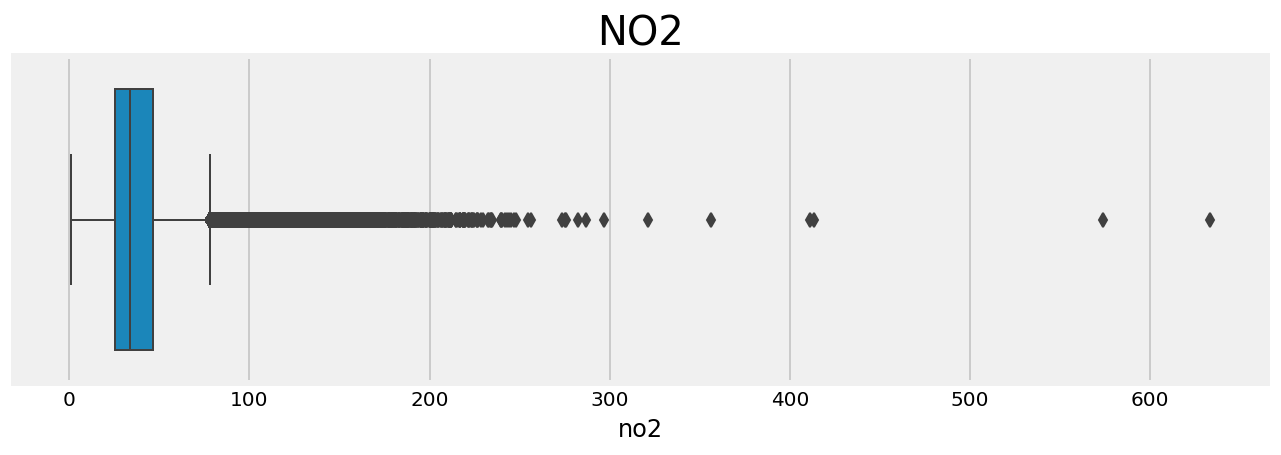

In [40]:
# use a boxplot to look at distribution of readings and outliers in the NO2 column

fig, ax = plt.subplots(figsize = (10, 3))

sns.boxplot('no2', data = pre_Covid, orient = 'h', width = 0.8, linewidth = 1, ax = ax)

ax.set_title('NO2', fontsize=20)

plt.show()

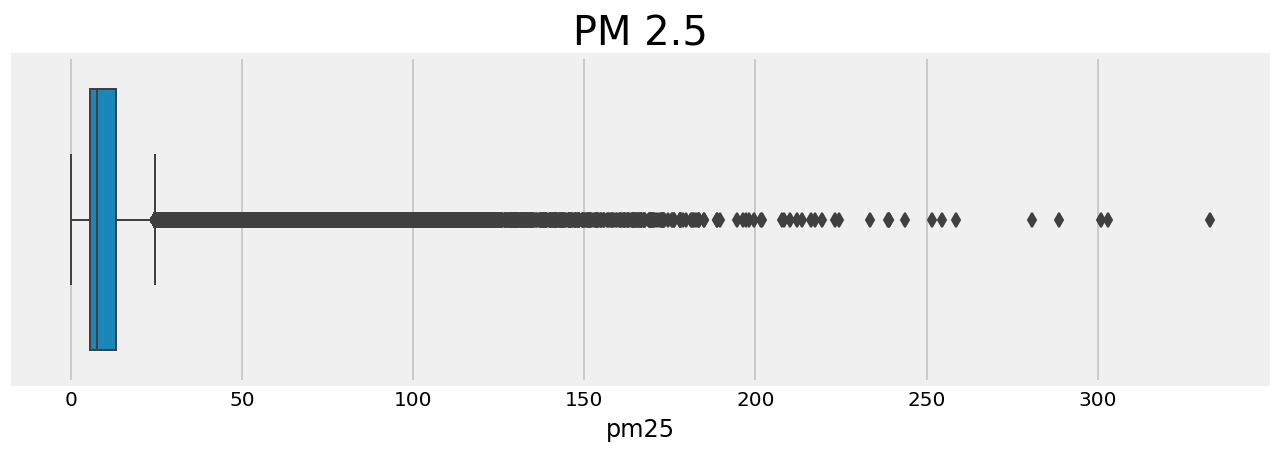

In [41]:
# use a boxplot to look at distribution of readings and outliers in the PM25 column

fig, ax = plt.subplots(figsize = (10, 3))

sns.boxplot('pm25', data = pre_Covid, orient = 'h', width = 0.8, linewidth = 1, ax = ax)

ax.set_title('PM 2.5', fontsize=20)

plt.show()

##### NO2 and PM2.5 readings by location

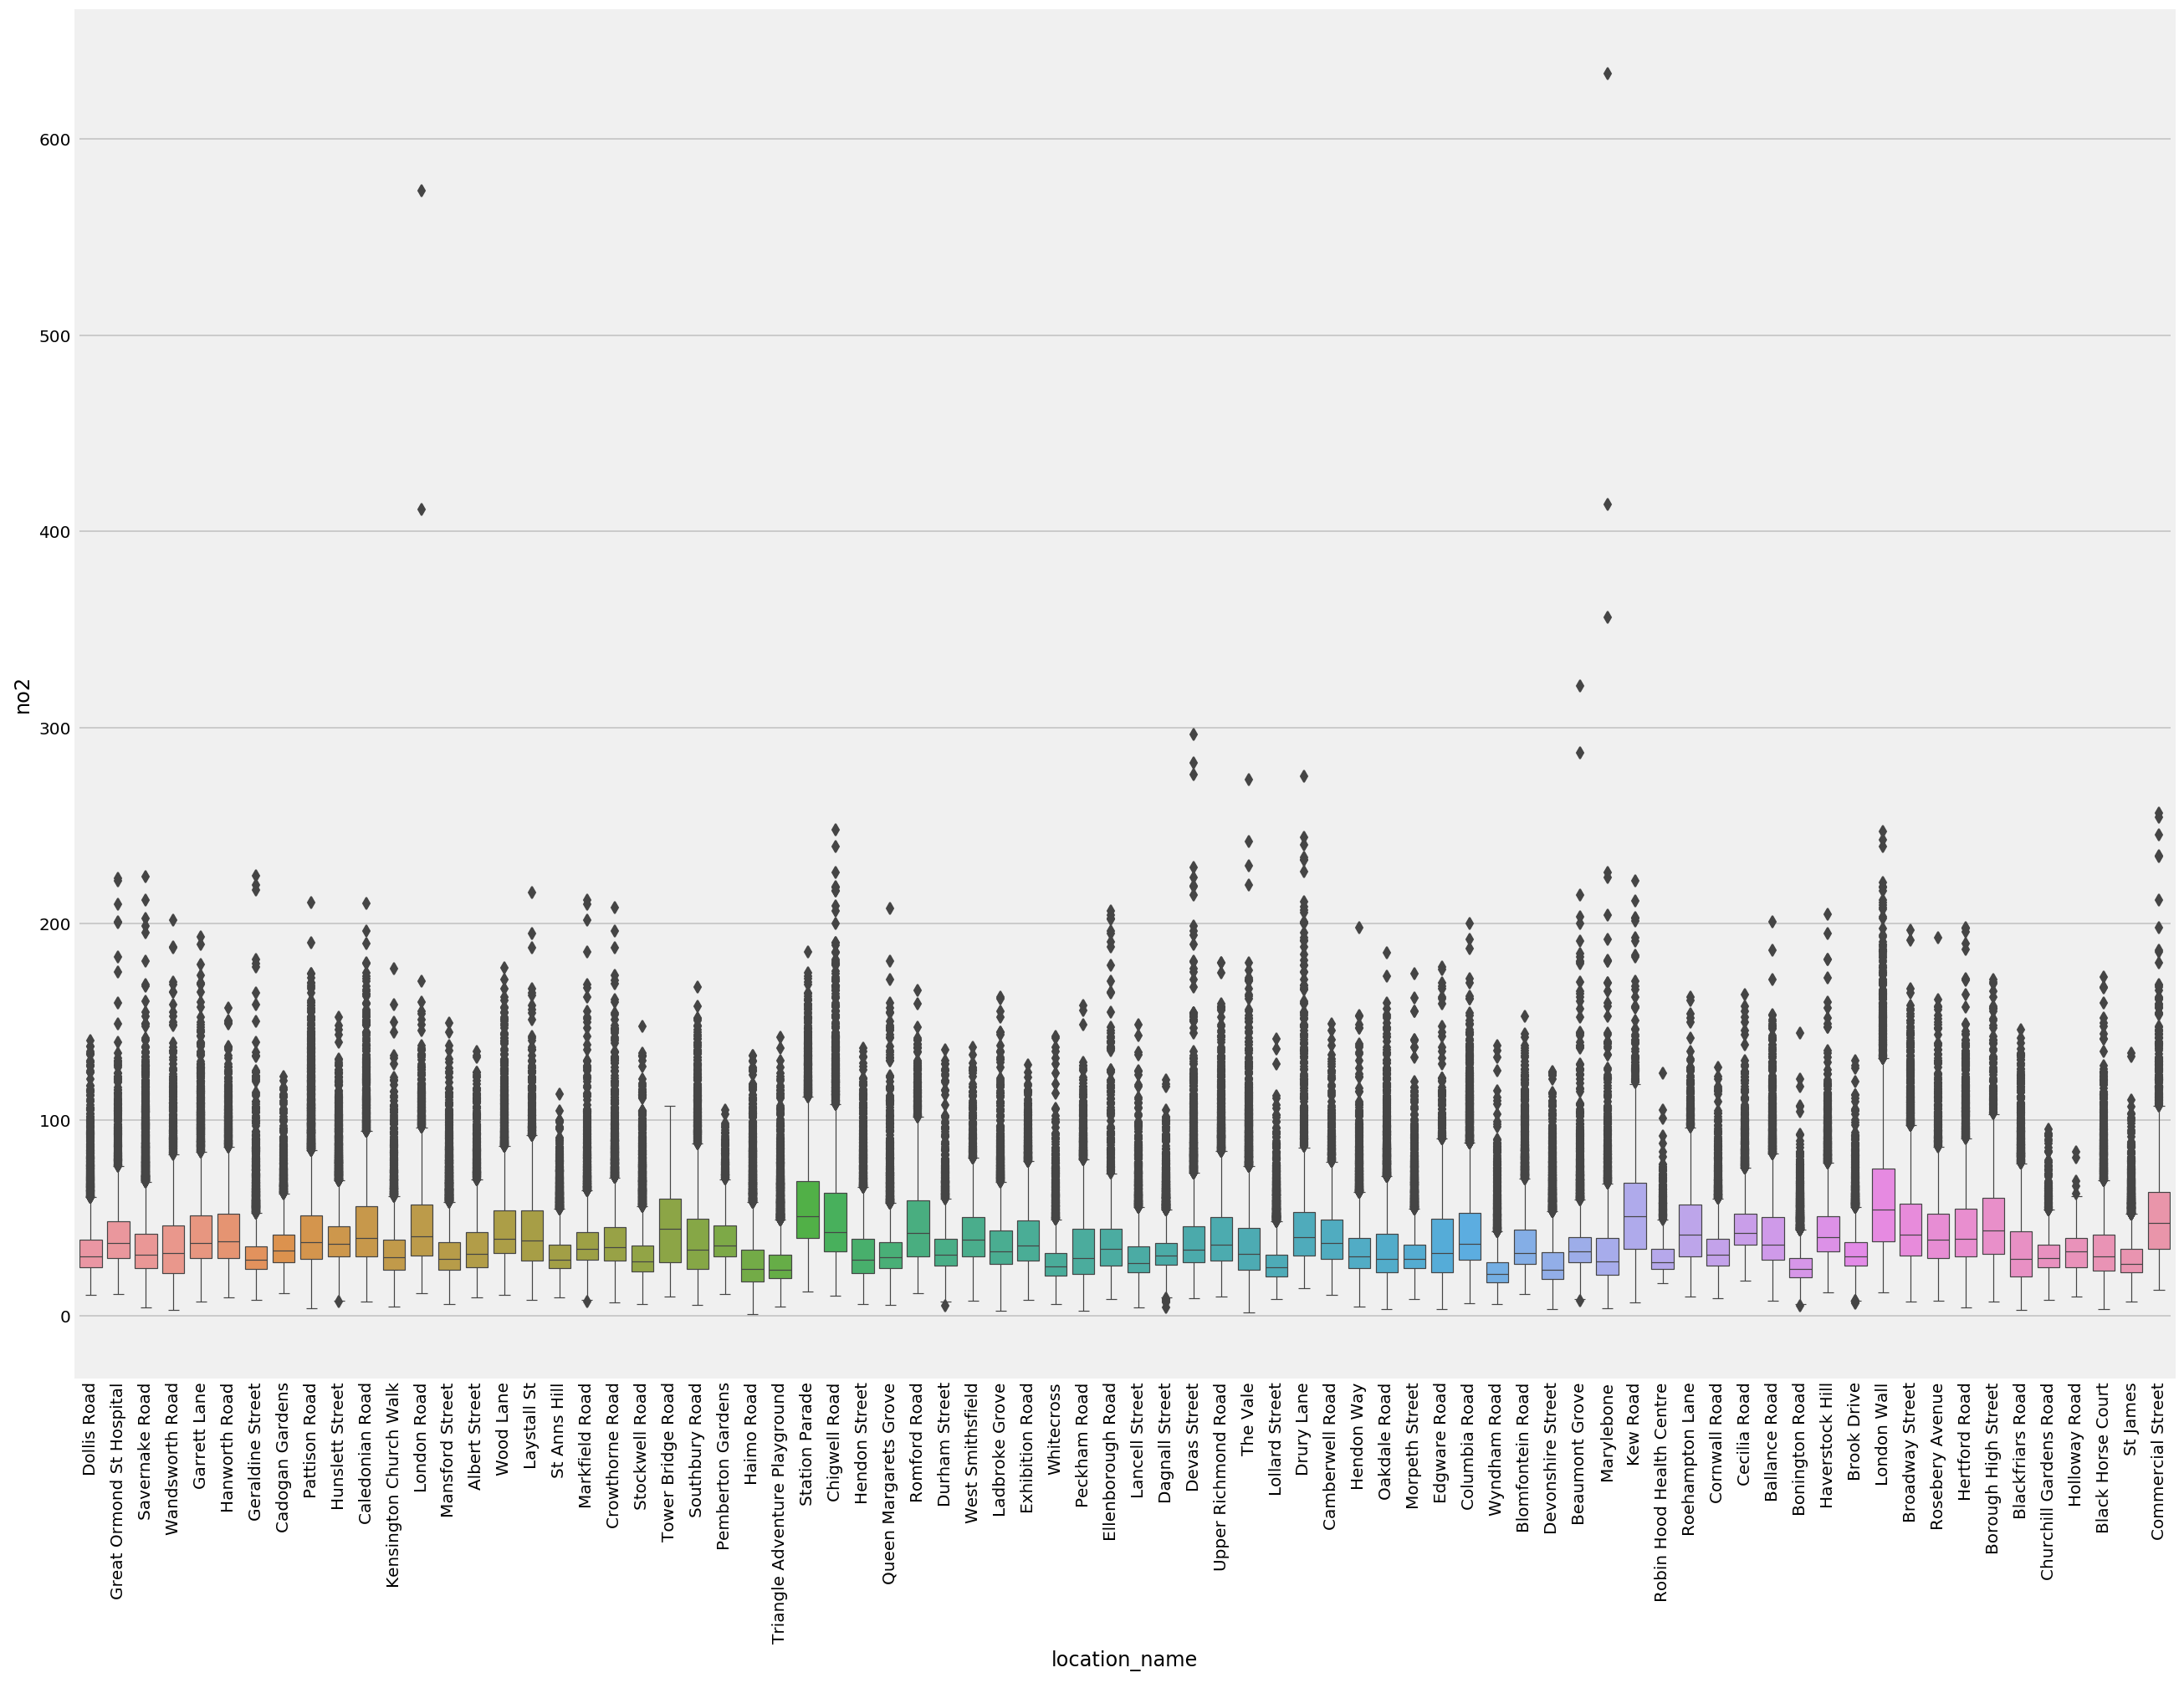

In [42]:
# boxplots showing distribution of NO2 readings for individual locations to see if there's a big difference 
# between them 

fig, ax = plt.subplots(figsize = (20, 15))

ax = sns.boxplot(x='location_name', y='no2', linewidth=0.6, data = pre_Covid)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

You can see from the boxplots above that there is a quite a difference between the readings for different locations - some have a much broader range than others. 

What most of the locations have in common data is that the distribution for each has quite a long tail; the interquartile range is not very big for most locations but the number of outliers at the top end is still quite large. Most of the readings cluster together but there are still a large number of much higher readings for most of the locations as well. It's more or less the same story for the PM2.5 readings below as well. 

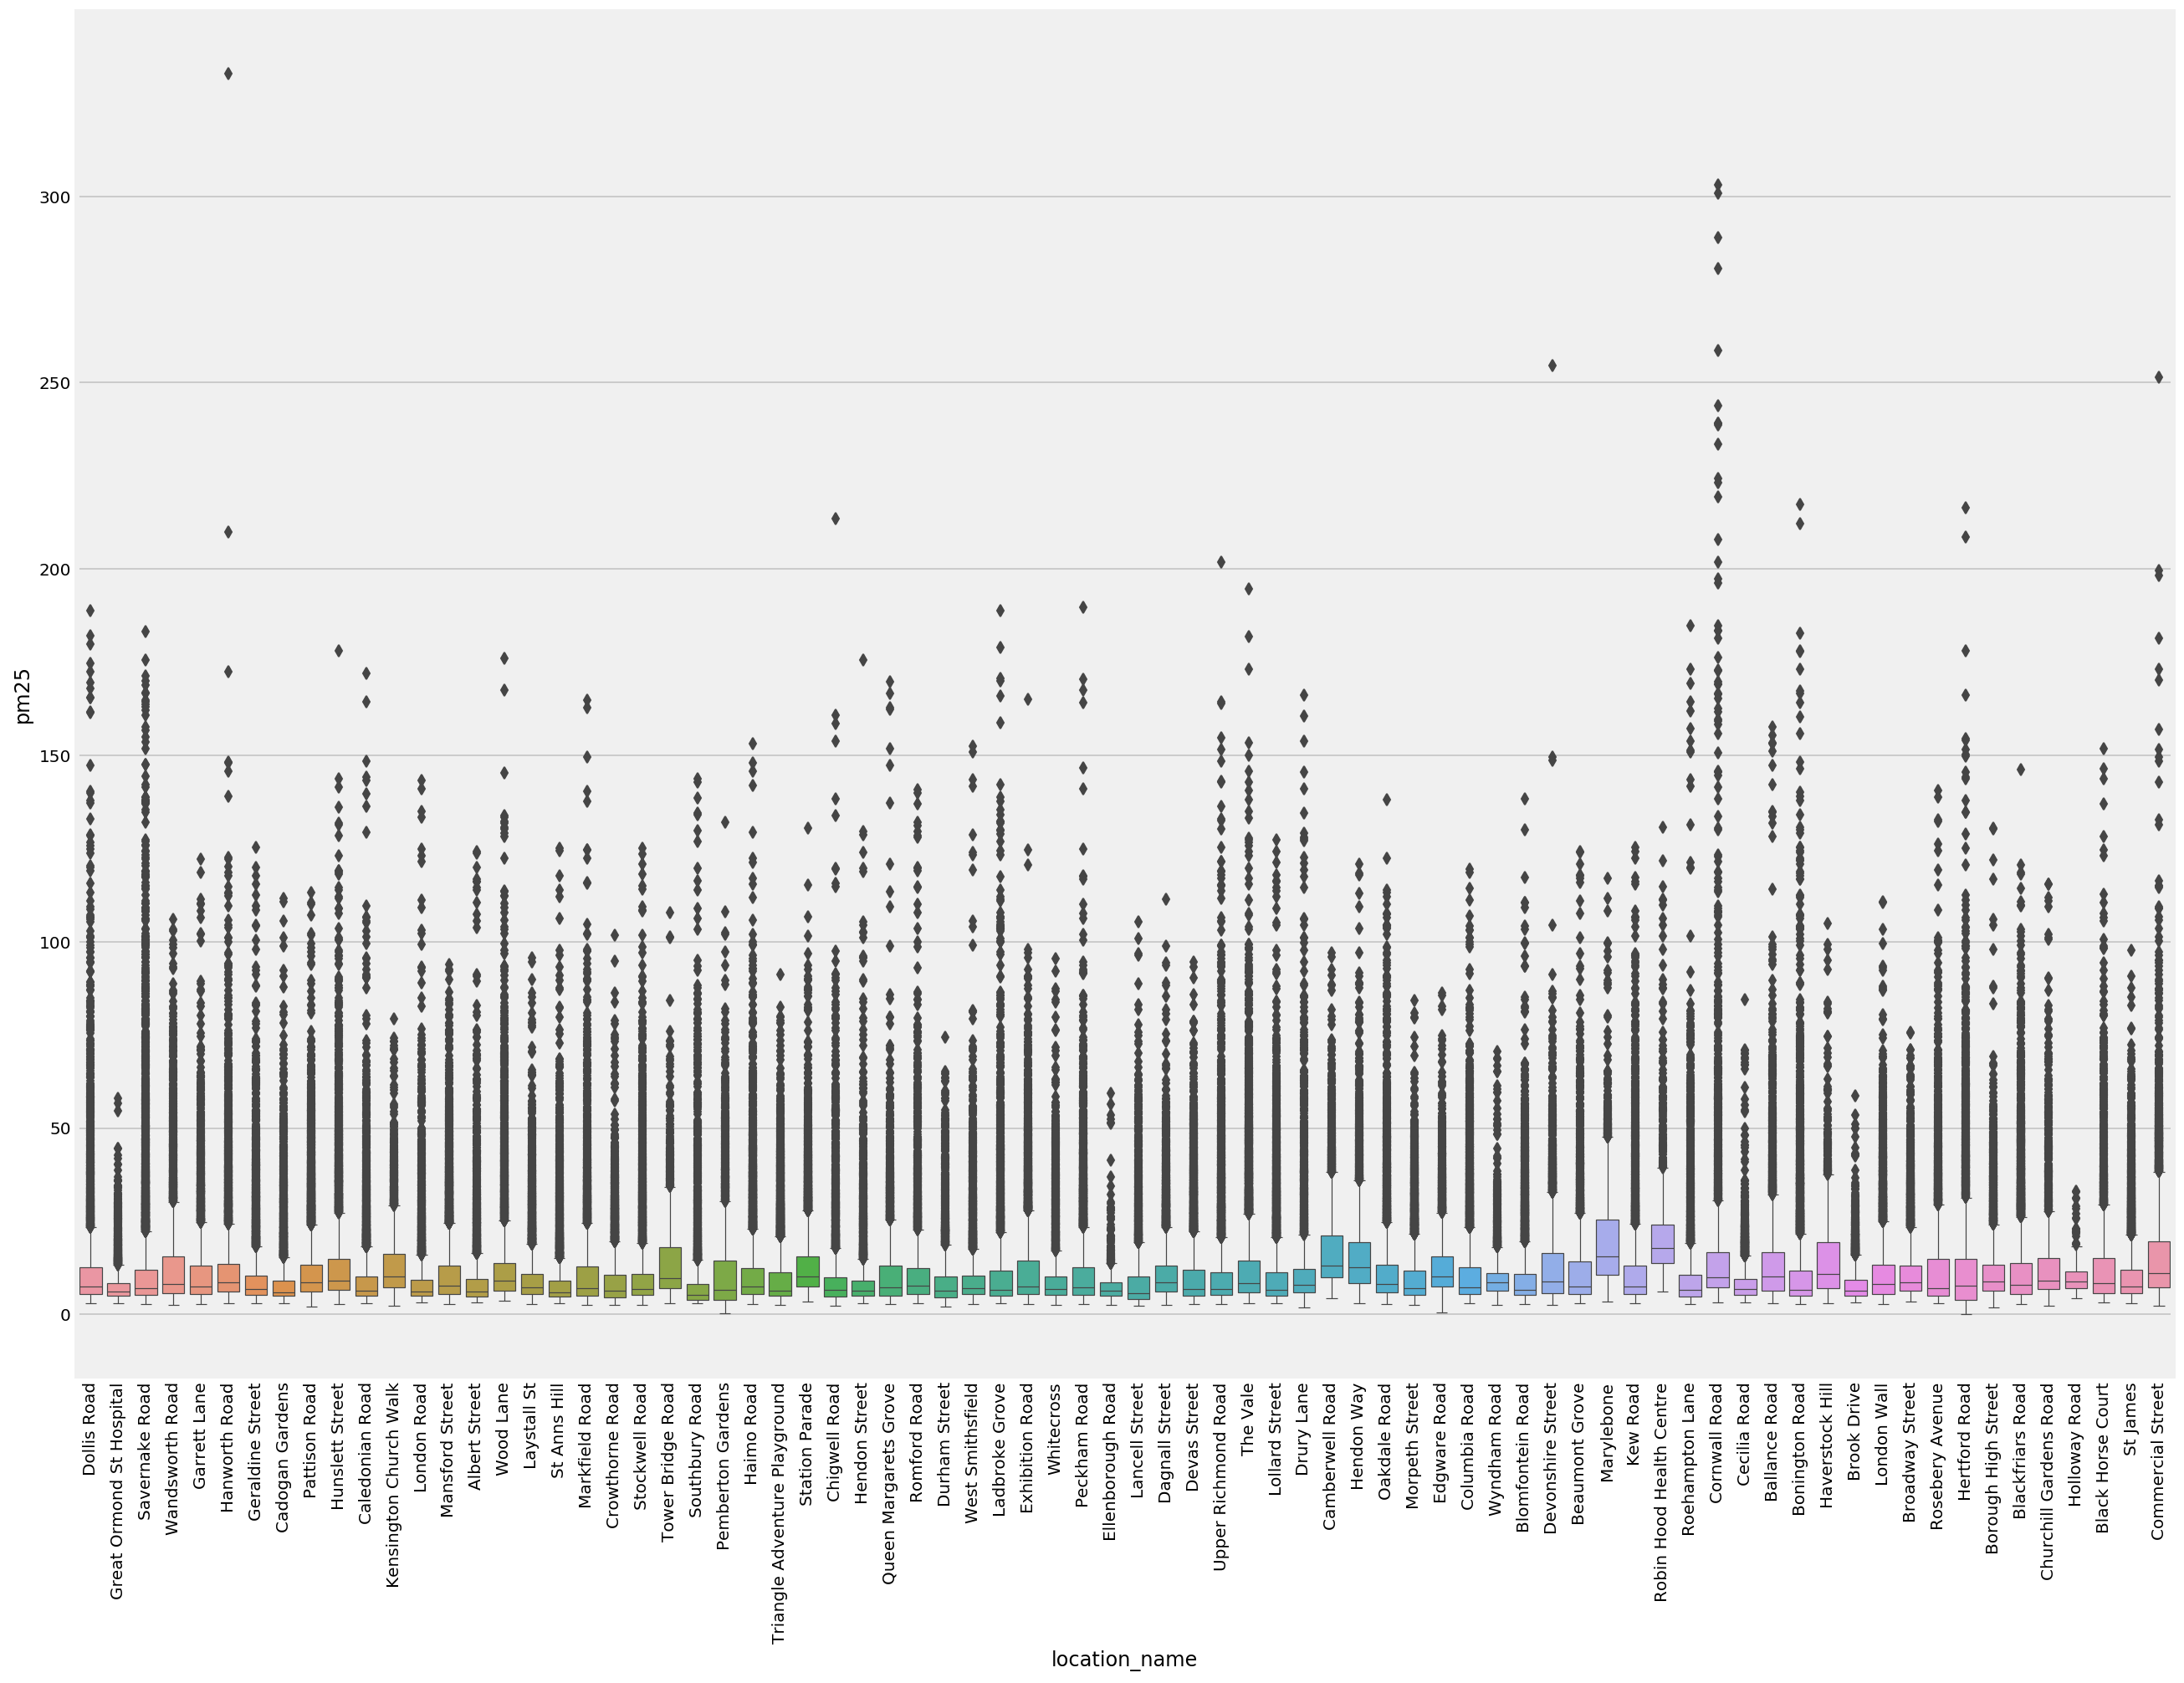

In [43]:
# boxplots showing distribution for individual locations to see if there's a big difference between them 

fig, ax = plt.subplots(figsize = (20, 15))

ax = sns.boxplot(x='location_name', y='pm25', linewidth=0.6, data = pre_Covid)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

##### Mean NO2 readings by month

Next I want to break it down by month to see whether particular times of year have generally higher readings than others. Below is a bar chart showing mean NO2 levels per month (pre-Covid), and below that, the same for PM2.5 readings.

This shows that NO2 levels were highest from November-February with July-August representing a smaller peak in the summertime. This may be related to NO2's relationship with Ozone - during hotter weather NO2 can be converted into Ozone, which might account for the lower levels in summer. Given that, it's not immediately clear to me why August might be a separate spike, but it may have something to do with higher levels of tourism into London in the summer during the national school holidays. 

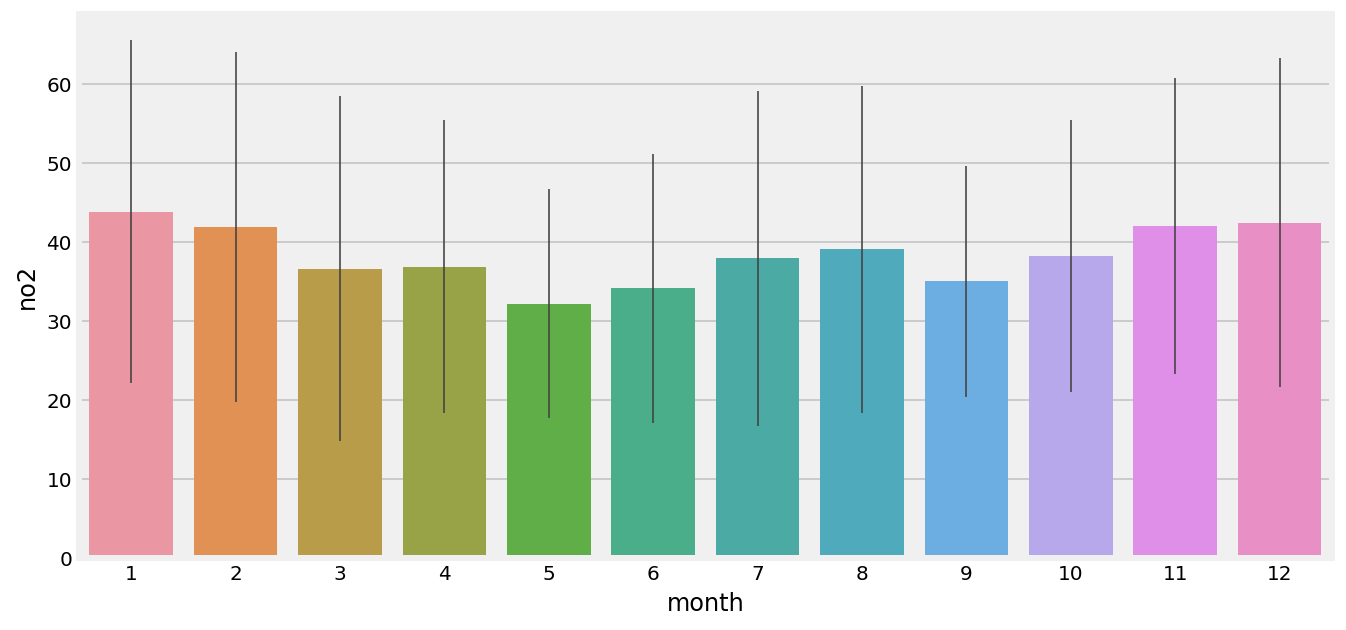

In [44]:
# bar chart of mean monthly NO2 readings, with a line showing size of the standard deviation instead of 
# the confidence error

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'month', y = 'no2', ci='sd', data=pre_Covid, errwidth=0.8)

To test my hypothesis about tourism in August causing higher levels of NO2, below is a bar chart of the levels of NO2 over the days of the week in January, April and August. My guess would be that commuter traffic causes most of the NO2 emissions most of the year. These take place Mon-Fri, so there should be lower levels of NO2 on weekends. If there's a lot more tourism in August then this may be more likely to take place on weekends and that might be visible on the chart. 

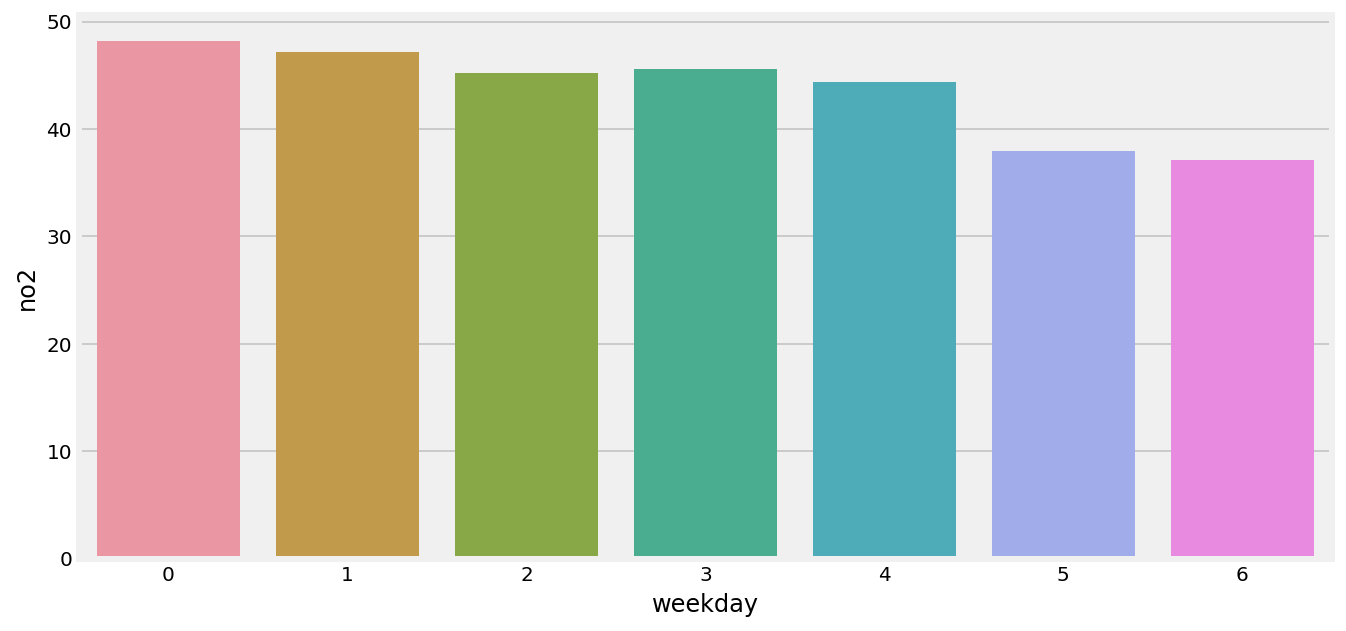

In [45]:
# Mask data for only readings taken in January

jan = pre_Covid[pre_Covid['month']==1]

# bar chart of weekday readings in Jan

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'weekday', y = 'no2', ci=None, data=jan, errwidth=0.8)

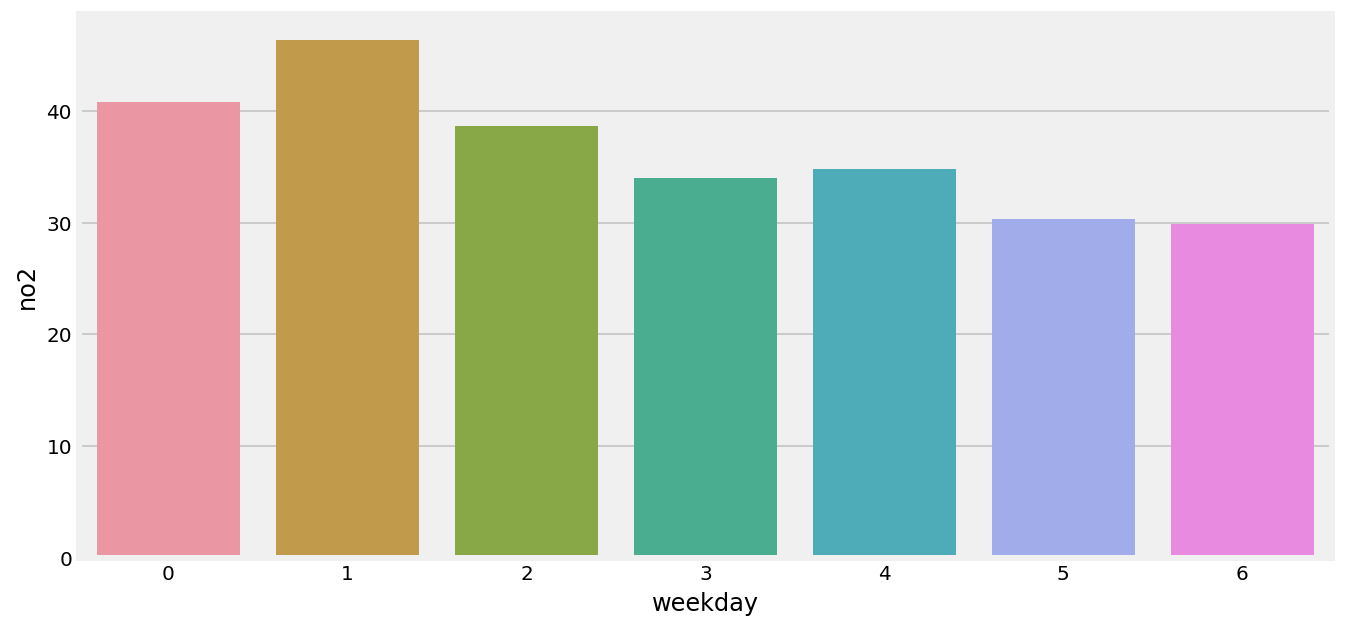

In [46]:
# Mask data for only readings taken in April

april = pre_Covid[pre_Covid['month']==4]

# bar chart of weekday readings in April

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'weekday', y = 'no2', ci=None, data=april, errwidth=0.8)

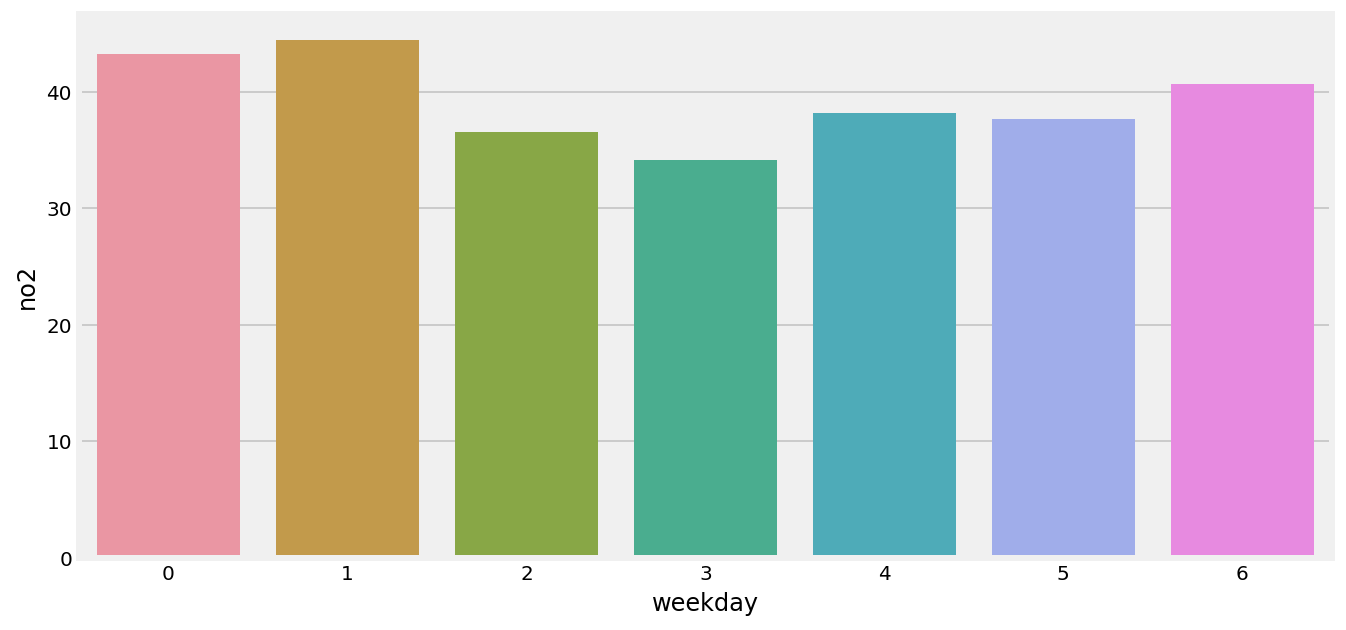

In [47]:
# Mask data for only readings taken in August

aug = pre_Covid[pre_Covid['month']==8]

# bar chart of weekday readings in August

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'weekday', y = 'no2', ci=None, data=aug, errwidth=0.8)

It seems to be correct that in 'non-holiday' months like January and April there's a clear difference between weekdays (0-4) which have higher emissions, and weekends (5-6) which are lower. 

In comparison, August has weekend emissions that are higher than some of the mid-week days, and the lowest point is Thursday. It's not definitive but it certainly shows a different pattern and tentatively supports my guess about holiday-makers causing higher emissions in August. 

##### Mean PM2.5 readings by month

In the chart for PM2.5 there seems to be an unusually high spike in April - it's not clear to me why this would be the case. 

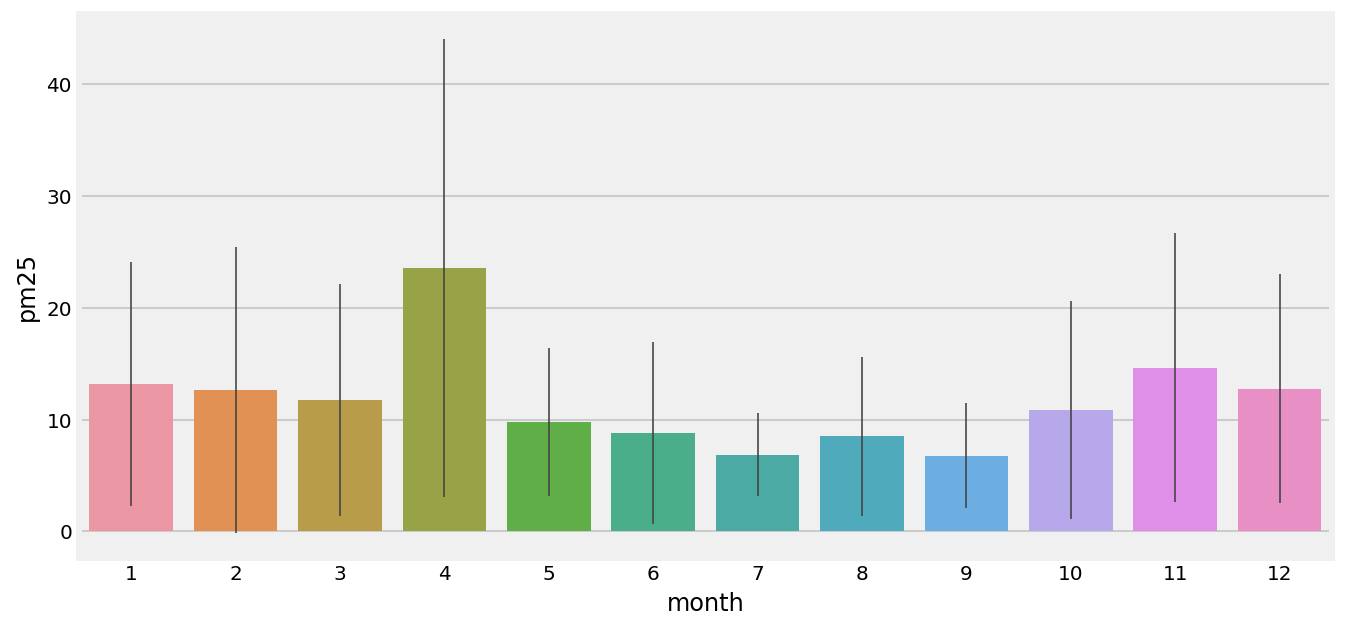

In [48]:
# bar chart of mean monthly PM25 readings, with a line showing size of the standard deviation instead of 
# the confidence error

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'month', y = 'pm25', ci='sd', data=pre_Covid, errwidth=0.8)

##### Highest readings by month

Below I've plotted the unusually high values of NO2 for each month, since unusually high readings are relevant in this case.  February and June are the most likely to register very high readings, although since there are only ~100 readings in total this isn't a particularly robust insight.

In [49]:
high_NO2 = pre_Covid[pre_Covid['no2']>200]

high_NO2.shape

(101, 16)

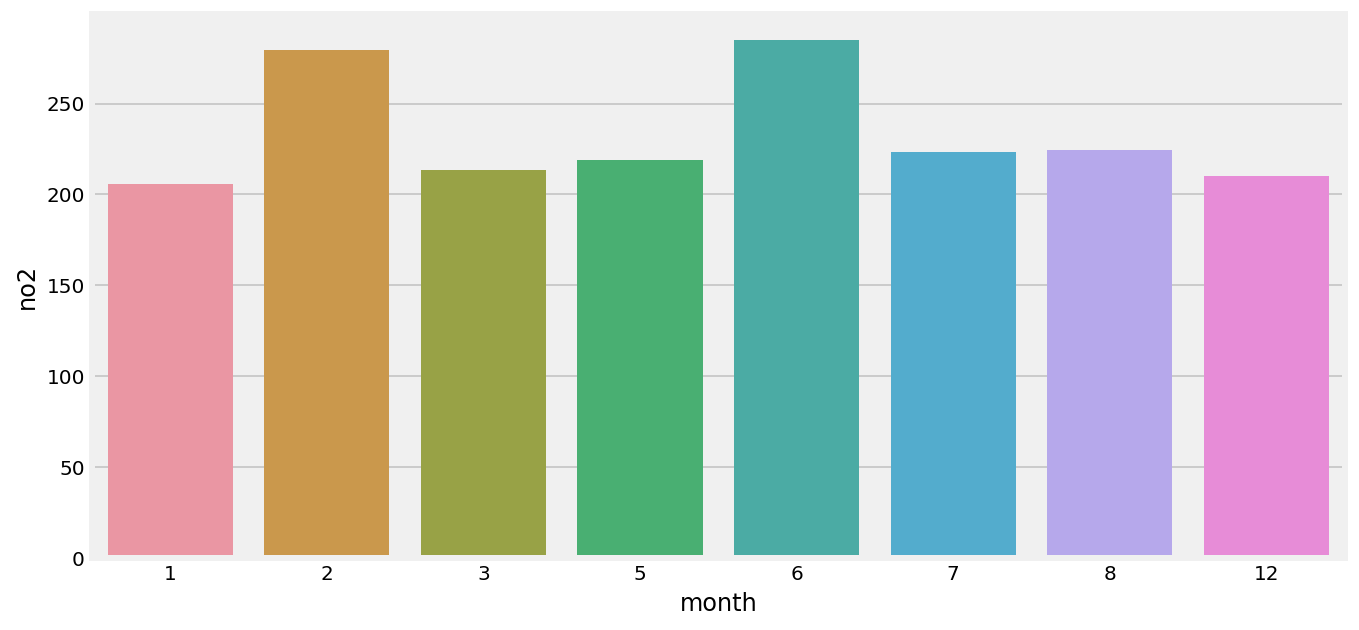

In [50]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'month', y = 'no2', ci=None, data=high_NO2, errwidth=0.8)

##### Mean NO2 and PM2.5 readings by hour of the day

Next I'd like to see how air pollution levels vary through the day. Below you can see mean NO2 and PM2.5 levels by hour of the day, pre-Covid lockdown. 

It's clear that the highest points for nitrogen (which is mostly produced by cars) are just following commuter rush hours, with a particular spike in the morning and a slightly more spread-out peak in the evening, and levels dropping over night to reach their lowest point at around 4am. 

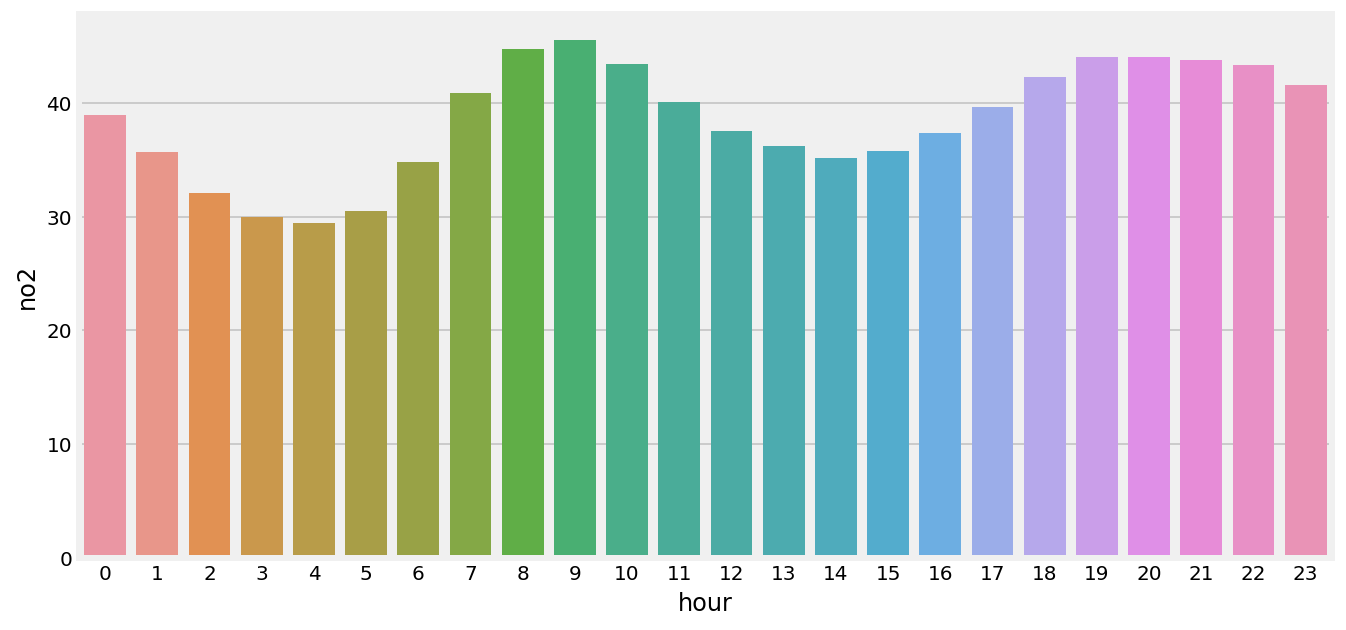

In [51]:
# bar chart of mean hourly NO2 readings

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'hour', y = 'no2', ci=None, data=pre_Covid, errwidth=0.8)

The chart below seems to suggest that unlike NO2 readings, particulate matter seems to stay fairly high during the night, rising slightly during the commuter traffic period and then dropping mid-afternoon. 

It's not immediately obvious why this would be the case but my best guess is that it's because diesel engines produce more particulate matter than petrol cars. Since delivery lorries with diesel engines are more likely to be operating at night and in the early hours of the morning, this might account for the relatively steady overnight levels and lower levels during the day/mid-afternoon.

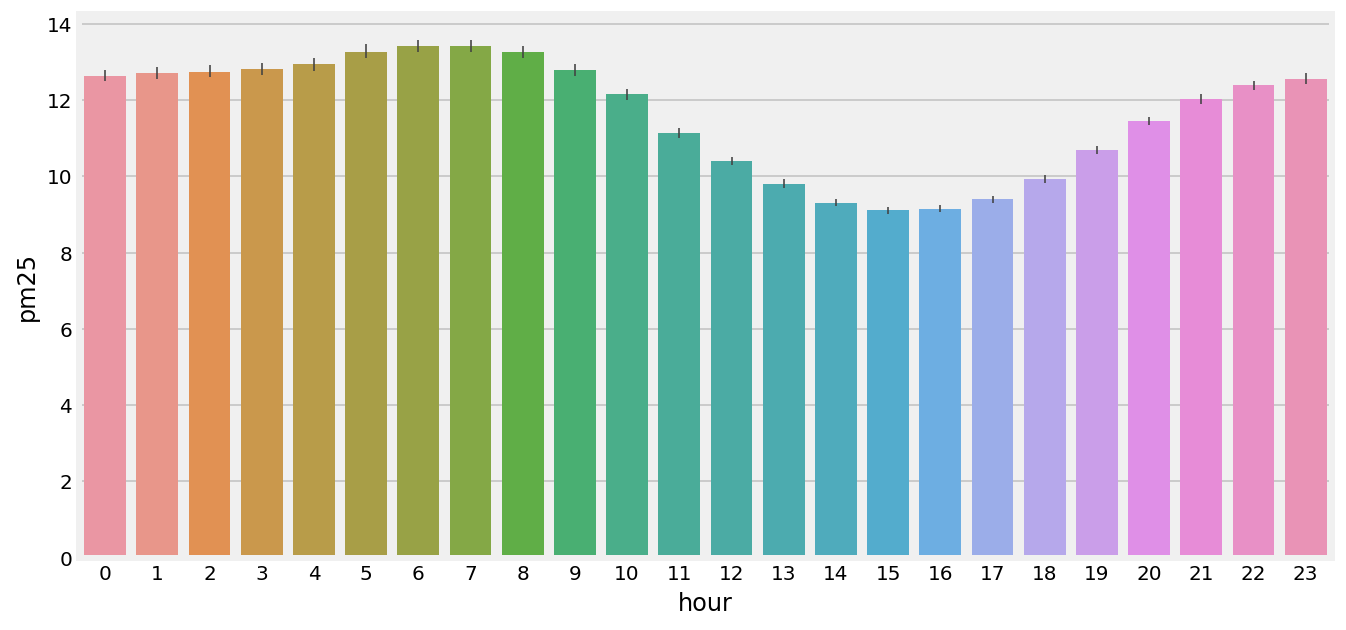

In [52]:
# bar chart of mean hourly PM2.5 readings

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'hour', y = 'pm25', data=pre_Covid, errwidth=0.8)

##### NO2 and PM2.5 readings by day of the week

I already looked above at how NO2 readings fluctuate over the week (during different months), but below you can see the difference in daily readings over each weekday, for NO2 and PM2.5

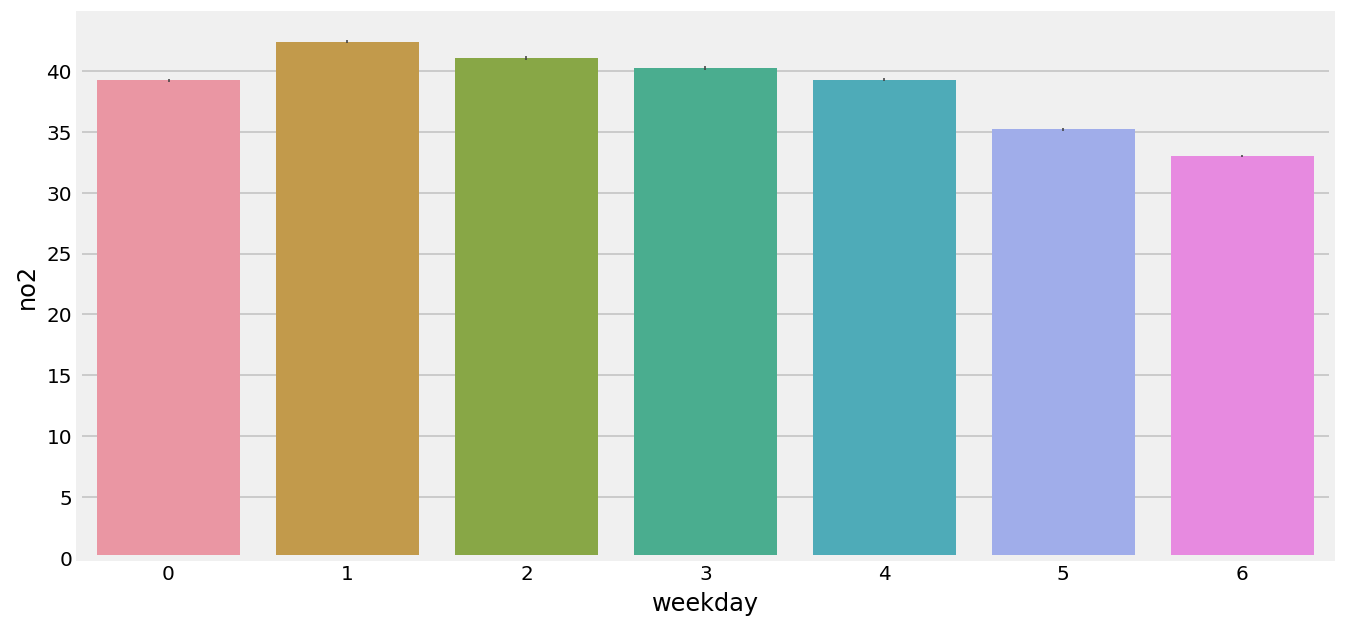

In [53]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'weekday', y = 'no2', data=pre_Covid, errwidth=0.8)

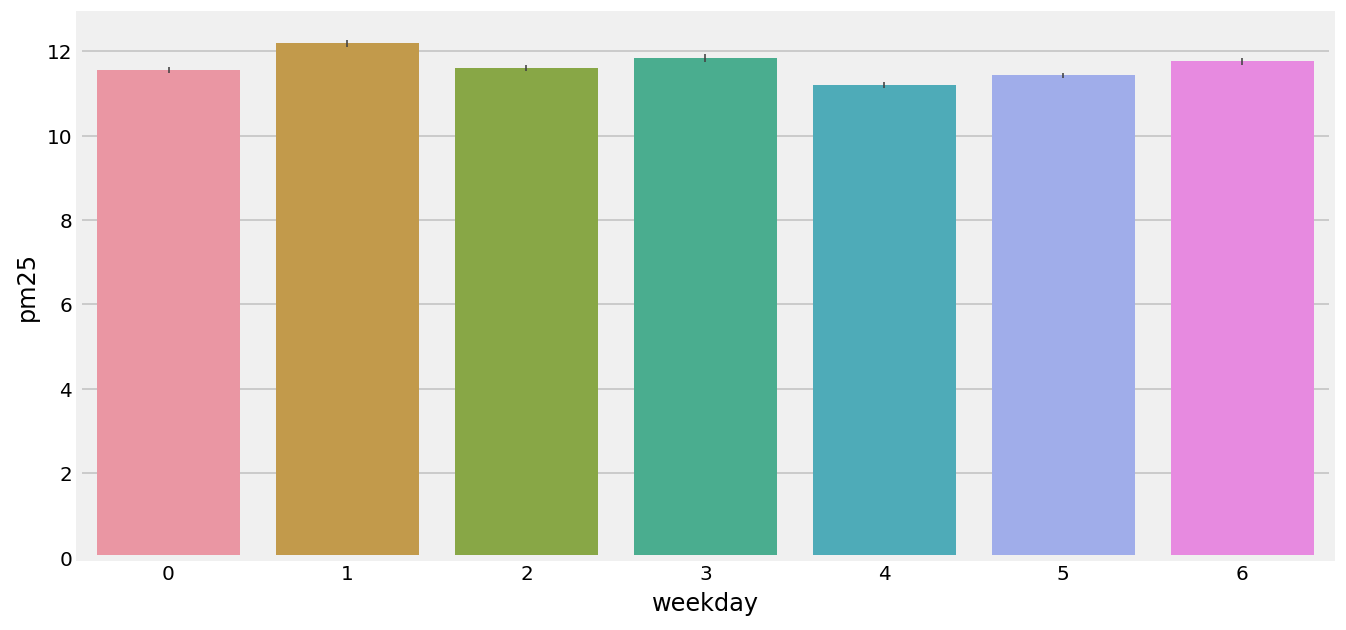

In [54]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x = 'weekday', y = 'pm25', data=pre_Covid, errwidth=0.8)

Again, particulate matter is steadier over the week than NO2 levels, just as it is over the day, and again I would put this down to PM2.5 being less influenced by commuter traffic fluctuations as more of it is produced by commercial diesel engines as well as other sources such as power stations and domestic heating. 

#### Post-Covid lockdown changes

So we've seen what pollution patterns looks like in 'normal' times. What happened to them post-lockdown in March 2020?

In fact they don't seem to have dropped as dramatically as I expected, though they are mostly at a lower average than in previous years (though with a spike in June). 

If we break this down, though, we can identify what has changed. 

In [55]:
# assign time periods for 2020 to separate variables

jan20 = AQ.loc['2020-01-01 00:00:00':'2020-01-31 23:59:59']

feb20 = AQ.loc['2020-02-01 00:00:00':'2020-02-29 23:59:59']

mar20 = AQ.loc['2020-03-01 00:00:00':'2020-03-30 00:00:00']

apr20 = AQ.loc['2020-04-01 00:00:00':'2020-04-30 23:59:59']

may20 = AQ.loc['2020-05-01 00:00:00':'2020-05-31 23:59:59']

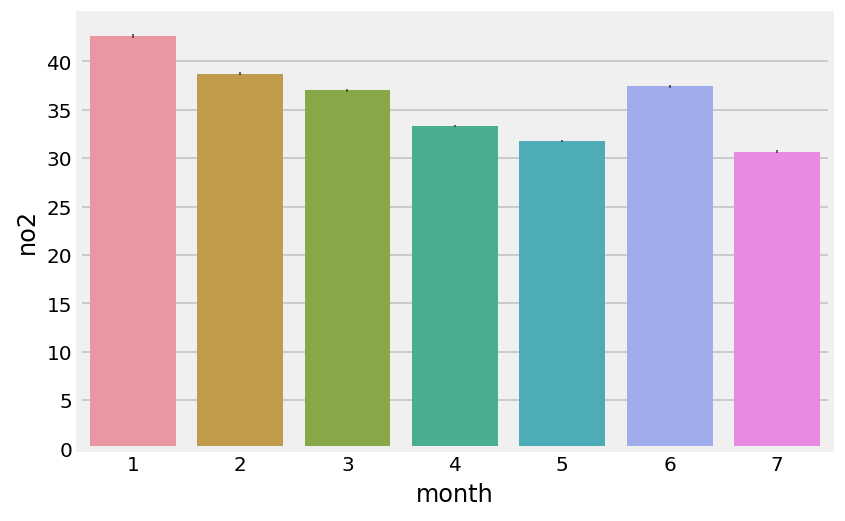

In [56]:
# average NO2 levels, Jan 2020 - July 2020

six_month = AQ.loc['2020-01-01 00:00:00':'2020-07-31 00:00:00']

ax = sns.barplot(x = 'month', y = 'no2', data=six_month, errwidth=0.8)

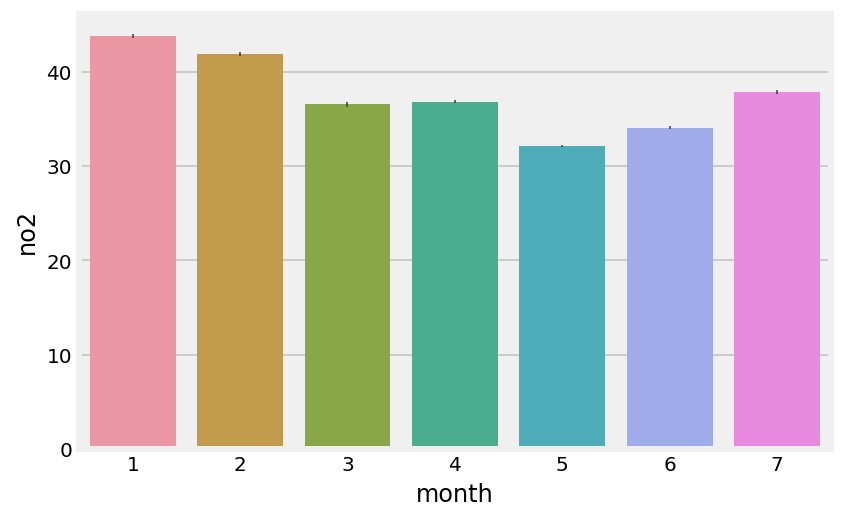

In [57]:
# average NO2 levels, for Jan - July in years before 2020

jan_jul_pre_20 = pre_Covid[(pre_Covid['month']>0) & (pre_Covid['month']<8)]

ax = sns.barplot(x = 'month', y = 'no2', data=jan_jul_pre_20, errwidth=0.8)

There's a particularly noticeable drop on the weekend of the 20th, when the pubs closed but before national lockdown was announced officially on Sunday evening. And in general the average daily readings across April were much lower than early March.

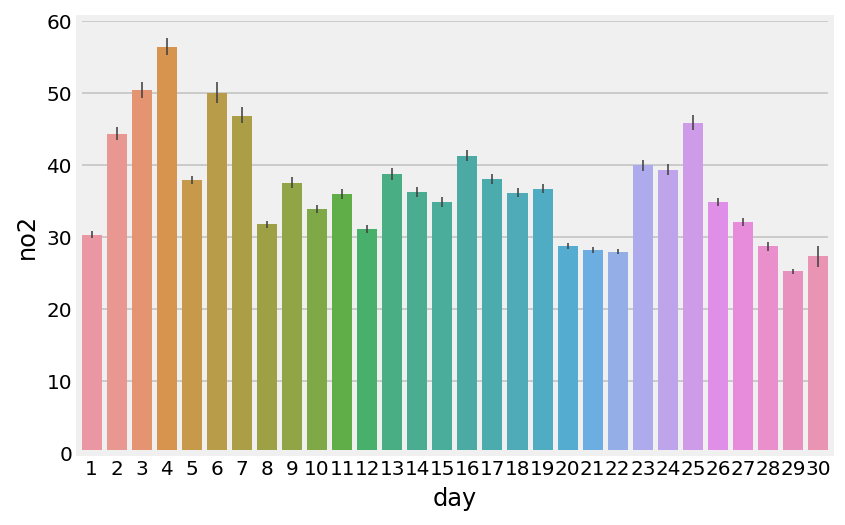

In [58]:
# mean NO2 readings over March '20

ax = sns.barplot(x = 'day', y = 'no2', data=mar20, errwidth=0.8)

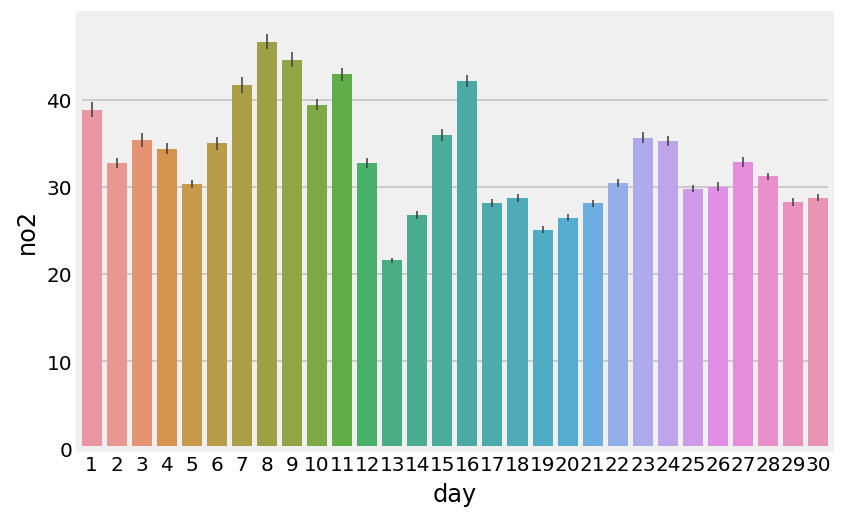

In [59]:
# mean NO2 readings over Apr '20

ax = sns.barplot(x = 'day', y = 'no2', data=apr20, errwidth=0.8)

You can see by comparing days of the week in February and April that commuter/mon-fri traffic is having less of an effect in April; in Feb the highest mean readings (nearly 50) are in the middle of week and lower on weekends, whereas in April the mean readings are much lower (rarely going over 35) and there's not as much variation between mid-week and weekends. 

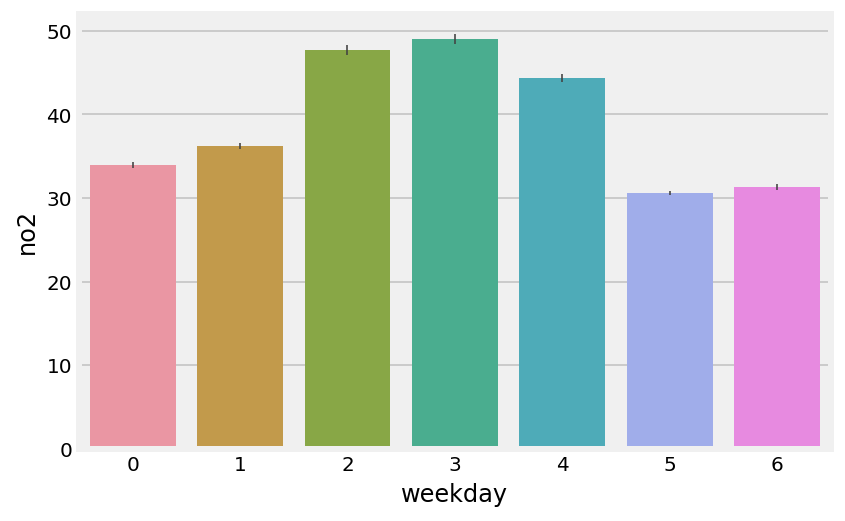

In [60]:
# mean NO2 readings for days of the week in Feb

ax = sns.barplot(x = 'weekday', y = 'no2', data=feb20, errwidth=0.8)

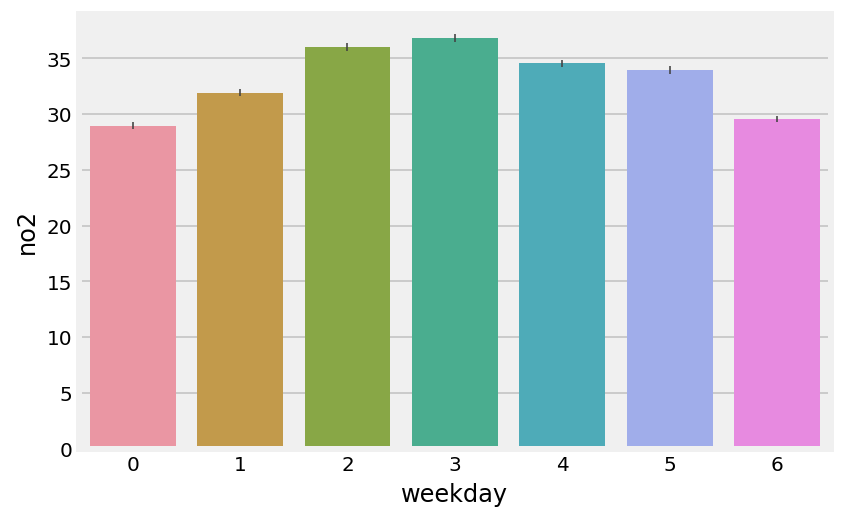

In [61]:
# mean NO2 readings for days of the week in April

ax = sns.barplot(x = 'weekday', y = 'no2', data=apr20, errwidth=0.8)

## Adding socioeconomic data

### Imputing postcode/geographic areas from latitude/longitude

Next, I'd like to match the locations to a postcode so that I can match it to socioeconomic data, which is usually reported on areas which are based on postcodes (at the lowest level) and then wards, boroughs, and other groupings (including Lower Super Output Areas and Medium Super Output Areas, which are regions used for NHS data).

There are only 76 unique locations (see below). One possibility would be to match the location names with postcodes, but these aren't necessarily exact and in any case a street name could have multiple postcodes, so I've decided to use the lat/long columns instead. 

In [79]:
AQ.location_name.nunique()

76

In [80]:
AQ.location_name.unique()

array(['Dollis Road', 'Great Ormond St Hospital', 'Savernake Road',
       'Wandsworth Road', 'Garrett Lane', 'Hanworth Road',
       'Geraldine Street', 'Cadogan Gardens', 'Pattison Road',
       'Hunslett Street', 'Caledonian Road', 'Kensington Church Walk',
       'London Road', 'Mansford Street', 'Albert Street', 'Wood Lane',
       'Laystall St', 'St Anns Hill', 'Markfield Road', 'Crowthorne Road',
       'Stockwell Road', 'Tower Bridge Road', 'Southbury Road',
       'Pemberton Gardens', 'Haimo Road', 'Triangle Adventure Playground',
       'Station Parade', 'Chigwell Road', 'Hendon Street',
       'Queen Margarets Grove', 'Romford Road', 'Durham Street',
       'West Smithsfield', 'Ladbroke Grove', 'Exhibition Road',
       'Whitecross', 'Peckham Road', 'Ellenborough Road',
       'Lancell Street', 'Dagnall Street', 'Devas Street',
       'Upper Richmond Road', 'The Vale', 'Lollard Street', 'Drury Lane',
       'Camberwell Road', 'Hendon Way', 'Oakdale Road', 'Morpeth Street',
 

To lookup postcodes for each lat/long I'm going to use an API at https://postcodes.io/

This API is great because not only does it give us the closest postcode for a given lat/long, in the same file it gives us all the other geographical designations we could want for that location. 

Below I've first asked the API for the details for Holloway Bus Garage.

In [81]:
from pprint import pprint
import requests

In [82]:
longitude = '-0.132947'
latitude = '51.561917'

In [83]:
url = 'https://api.postcodes.io/postcodes?lon='+longitude +'&lat='+latitude

print(url)

https://api.postcodes.io/postcodes?lon=-0.132947&lat=51.561917


In [84]:
params = dict(longitude=longitude, latitude=latitude)

In [85]:
r_ = requests.get(url=url, params=params)

In [86]:
print(r_.text)

{"status":200,"result":[{"postcode":"N19 5RS","quality":1,"eastings":529507,"northings":186469,"country":"England","nhs_ha":"London","longitude":-0.133076,"latitude":51.562238,"european_electoral_region":"London","primary_care_trust":"Islington","region":"London","lsoa":"Islington 004E","msoa":"Islington 004","incode":"5RS","outcode":"N19","parliamentary_constituency":"Islington North","admin_district":"Islington","parish":"Islington, unparished area","admin_county":null,"admin_ward":"Junction","ced":null,"ccg":"NHS North Central London","nuts":"Haringey and Islington","codes":{"admin_district":"E09000019","admin_county":"E99999999","admin_ward":"E05000376","parish":"E43000209","parliamentary_constituency":"E14000763","ccg":"E38000240","ccg_id":"93C","ced":"E99999999","nuts":"UKI43"},"distance":36.81745257},{"postcode":"N19 5RU","quality":1,"eastings":529439,"northings":186484,"country":"England","nhs_ha":"London","longitude":-0.134051,"latitude":51.562389,"european_electoral_region":"

In [87]:
json_ = r_.json()
pprint(json_)

{'result': [{'admin_county': None,
             'admin_district': 'Islington',
             'admin_ward': 'Junction',
             'ccg': 'NHS North Central London',
             'ced': None,
             'codes': {'admin_county': 'E99999999',
                       'admin_district': 'E09000019',
                       'admin_ward': 'E05000376',
                       'ccg': 'E38000240',
                       'ccg_id': '93C',
                       'ced': 'E99999999',
                       'nuts': 'UKI43',
                       'parish': 'E43000209',
                       'parliamentary_constituency': 'E14000763'},
             'country': 'England',
             'distance': 36.81745257,
             'eastings': 529507,
             'european_electoral_region': 'London',
             'incode': '5RS',
             'latitude': 51.562238,
             'longitude': -0.133076,
             'lsoa': 'Islington 004E',
             'msoa': 'Islington 004',
             'nhs_ha': 'London',
  

In [88]:
json_.keys()

dict_keys(['status', 'result'])

The resulting response contains a list of two potential matching postcodes - I'll use the one with the highest quality rating (which rates how accurate/approximate the position is, see https://postcodes.io/docs) or the first one if both have the same rating. Both dictionaries in the list have the same keys.

In [89]:
json_['result'][0].keys()

dict_keys(['postcode', 'quality', 'eastings', 'northings', 'country', 'nhs_ha', 'longitude', 'latitude', 'european_electoral_region', 'primary_care_trust', 'region', 'lsoa', 'msoa', 'incode', 'outcode', 'parliamentary_constituency', 'admin_district', 'parish', 'admin_county', 'admin_ward', 'ced', 'ccg', 'nuts', 'codes', 'distance'])

Next I need to use this to iterate through every row in the AQ dataframe and map the appropriate geographic designations for each location into new columns. I might want to add these to the metadata df as well because after I've added the actual data that references these columns I'll probably drop the geographic designation. 